# 목적

*   유방암 데이터셋을 활용하여 차원 축소 기법을 적용한 인공지능 모델을 개발하여 유방암 진단 정확도를 향상시키고, 데이터 분석 및 모델 해석 능력을 향상시키다.




In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [121]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier





In [122]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.head()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [123]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [124]:
print(cancer.feature_names[:])                                      #넘파이에서 feature name 알아보기

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [125]:
cancer_df.columns[:]                                                  #판다스에서 feature name 알아보기

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

# 인공지능에게 feature name을 물어보다.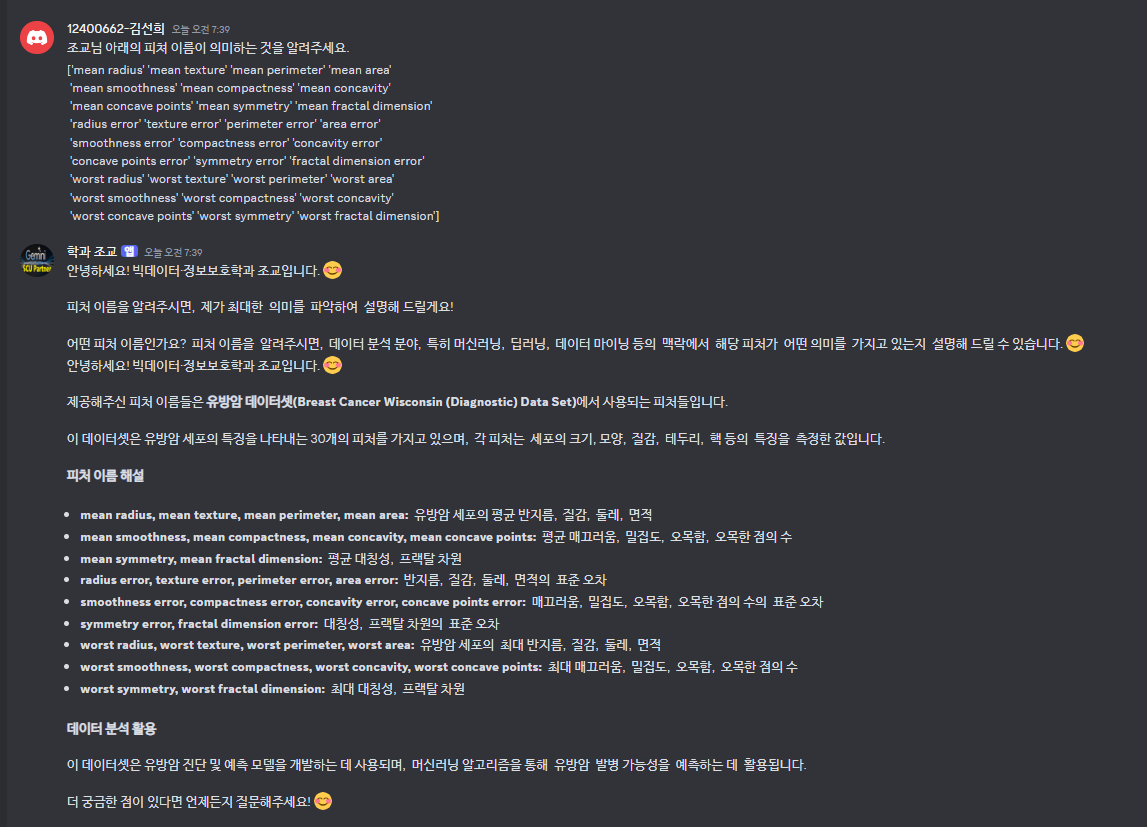

# 타겟값 확인

*   비율 확인하기




In [126]:
cancer_df["target"].mean()

0.6274165202108963

# 결측치 처리

In [127]:
cancer_df.isnull().sum()                                         # 결측치 없음

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [128]:
print(len(x_train_all), len(x_test))

455 114


In [129]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all,
                                                  test_size=0.2, random_state=42)

In [130]:
print(len(x_train), len(x_val))

364 91


# 차원축소



*   칼럼 수를 줄여 모델의 성능을 높여 본다.




In [131]:
from sklearn.decomposition import PCA
decomposition = PCA(n_components=2, random_state=42)
decomp_data = decomposition.fit_transform(cancer_df)
decomp_data = pd.DataFrame(decomp_data).add_prefix("decomp_")
decomp_data["target"] = cancer_df["target"]
decomp_data.head()
decomp_data

,decomp_0,decomp_1,target
0,1160.142744,-293.917535,0
1,1269.122597,15.630194,0
2,995.794082,39.156723,0
3,-407.180411,-67.380505,0
4,930.341382,189.340710,0
...,...,...,...
564,1414.126817,110.222522,0
565,1045.019040,77.057573,0
566,314.502046,47.553423,0
567,1124.858290,34.129218,0


In [132]:
import plotly.express as px
fig = px.scatter(decomp_data, x="decomp_0", y="decomp_1", color="target")
fig.show()

In [133]:
sgd = SGDClassifier(loss='log_loss', random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_val, y_val)

0.6923076923076923

In [134]:
sgd = SGDClassifier(loss='log_loss', random_state=42)
X = decomp_data[["decomp_0", "decomp_1"]]
y = decomp_data["target"]
sgd.fit(X, y)
sgd.score(X, y)

0.9209138840070299

In [135]:
sgd = SGDClassifier(loss='squared_hinge', random_state=42)
X = decomp_data[["decomp_0", "decomp_1"]]
y = decomp_data["target"]
sgd.fit(X, y)
sgd.score(X, y)

0.9191564147627417

In [136]:
sgd = SGDClassifier(loss='modified_huber', random_state=42)
X = decomp_data[["decomp_0", "decomp_1"]]
y = decomp_data["target"]
sgd.fit(X, y)
sgd.score(X, y)

0.8980667838312829

In [137]:
sgd = SGDClassifier(loss='log_loss', random_state=42, penalty='elasticnet')    # 가장 성능이 높음
X = decomp_data[["decomp_0", "decomp_1"]]
y = decomp_data["target"]
sgd.fit(X, y)
sgd.score(X, y)

0.9226713532513181

In [138]:
sgd = SGDClassifier(loss='log_loss', random_state=42, penalty='l2')      #L2 규제 적용
X = decomp_data[["decomp_0", "decomp_1"]]
y = decomp_data["target"]
sgd.fit(X, y)
sgd.score(X, y)

0.9209138840070299

In [139]:
sgd = SGDClassifier(loss='log_loss', random_state=42, penalty='l1')   #L1 규제 적용
X = decomp_data[["decomp_0", "decomp_1"]]
y = decomp_data["target"]
sgd.fit(X, y)
sgd.score(X, y)

0.9068541300527241